<a href="https://colab.research.google.com/github/habilmaulana/Mini-Project/blob/main/Habil_Maulana_Yusuf_Conqueror_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold

#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

#Miscellaneous Utilitiy Libraries--------------------------------------
import random
from datetime import datetime
import string

# 2. Set Up the current working directory & Import Dataset

In [ ]:
# Step 2: Import the dataset
dataset = pd.read_csv('customer_churn_data.csv')

#Step 3: Read Dataset
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 4. Evaluate Data Structure

In [ ]:
# Step 4: Evaluate data structure
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#Recheck Column Datatypes and Missing Values:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [ ]:
#check missing values
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
#Unique values in each categorical variable:
dataset["PaymentMethod"].nunique()
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
dataset["Contract"].nunique()
dataset["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
dataset["TotalCharges"].nunique()
dataset["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# 5. Check Target Variable Distribution

In [ ]:
#Step 5: Check Target Variable Distribution -----------------------------------------------
dataset["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


What happen here?

Answer: Data ini menunjukkan imbalance atau ketidakseimbangan dalam distribusi kelas, karena jumlah pelanggan yang tidak churn jauh lebih banyak dibandingkan yang churn.

# 6. Clean the Dataset

In [ ]:
#Step 6: Clean the Dataset----------------------------------------------------------------------
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"],errors='coerce')
dataset["TotalCharges"] = dataset["TotalCharges"].astype("float")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
#Step 7: Take care of missing data---------------------------------------------------------------
# Find the average/median and fill missing values of each columns programmatically.
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].to_list()
for col in dataset.columns[1:]:
  if col in na_cols:
    if dataset[col].dtype != object:
      dataset[col] = dataset[col].fillna(dataset[col].mean()).round(0)

In [ ]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


# 8. Label Encode Binary data

In [ ]:
#Step 8: label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
  if dataset[col].dtype == 'object':
    if len(list(dataset[col].unique())) <= 2:
      print(col)
      le.fit(dataset[col])
      dataset[col] = le.transform(dataset[col])
      le_count += 1
print("{} columns were label encoded". format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded


In [ ]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


# 9. Exploratory Data Analysis

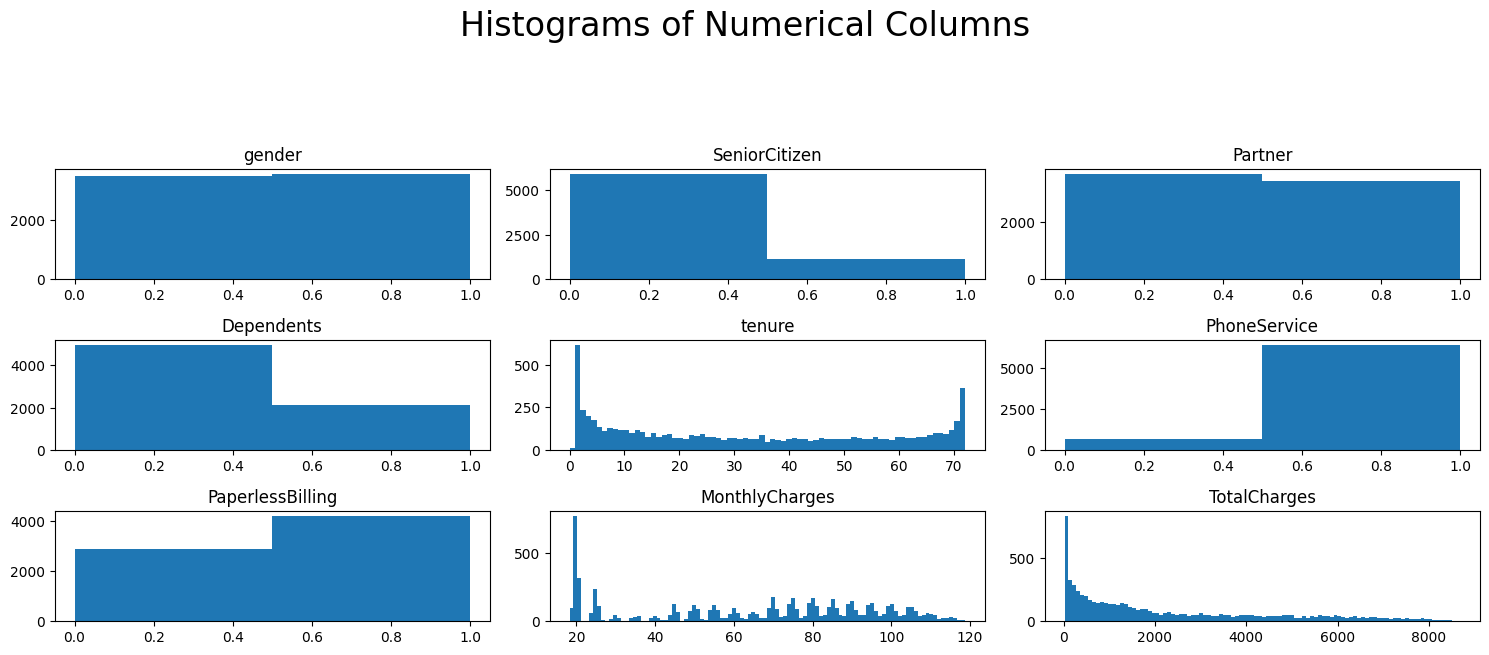

In [ ]:
#Step 9: Exploratory Data Analysis----------------------------------------------------------------------

#Step 9.1. Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
#Histogram:

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals)#, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

Answer
1. **gender**: Distribusi hampir seimbang antara pria dan wanita.  
2. **SeniorCitizen**: Mayoritas pelanggan bukan lansia.  
3. **Partner**: Lebih banyak pelanggan yang tidak memiliki pasangan.  
4. **Dependents**: Sebagian besar pelanggan tidak memiliki tanggungan anak.  
5. **Tenure**: Banyak pelanggan baru, tetapi ada lonjakan pada pelanggan lama yang loyal.  
6. **PhoneService**: Mayoritas pelanggan menggunakan layanan telepon, meski ada sebagian kecil yang tidak.  
7. **PaperlessBilling**: Sebagian besar pelanggan menggunakan tagihan elektronik.  
8. **MonthlyCharges**: Distribusi cukup merata dengan sedikit kemiringan ke kanan.  
9. **TotalCharges**: Distribusi miring ke kanan; banyak pelanggan dengan tagihan rendah, kemungkinan besar pelanggan baru.

In [ ]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

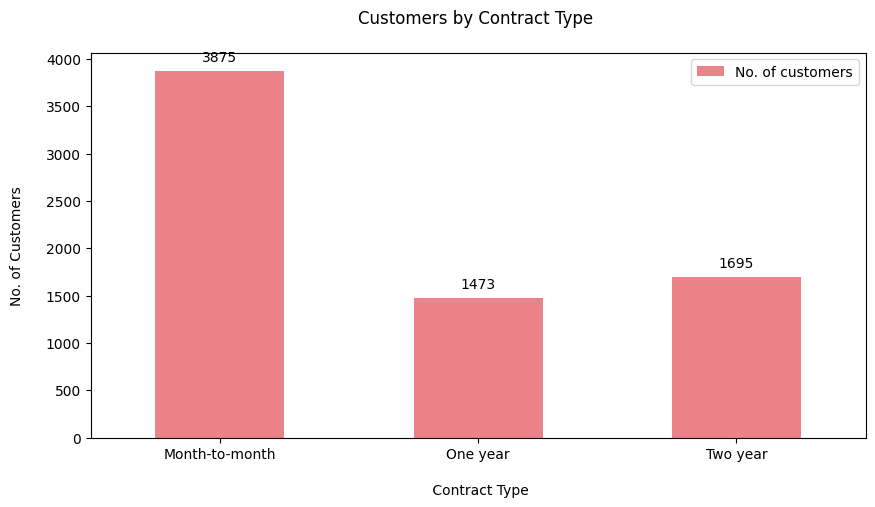

In [ ]:
#Step 9.2. Analyze distribution of Key Categorical Variables---------------------------------------------

#(1) Distribution of Contract Type----------------------------------------------------------------------------------------

contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#ec838a', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

Answer:
1. Mayoritas pelanggan memilih kontrak bulanan (3.875 pelanggan), jauh lebih banyak dibandingkan jenis kontrak lainnya.  
2. Pelanggan dengan kontrak bulanan lebih berisiko churn karena fleksibilitasnya lebih tinggi dibandingkan kontrak satu atau dua tahun.

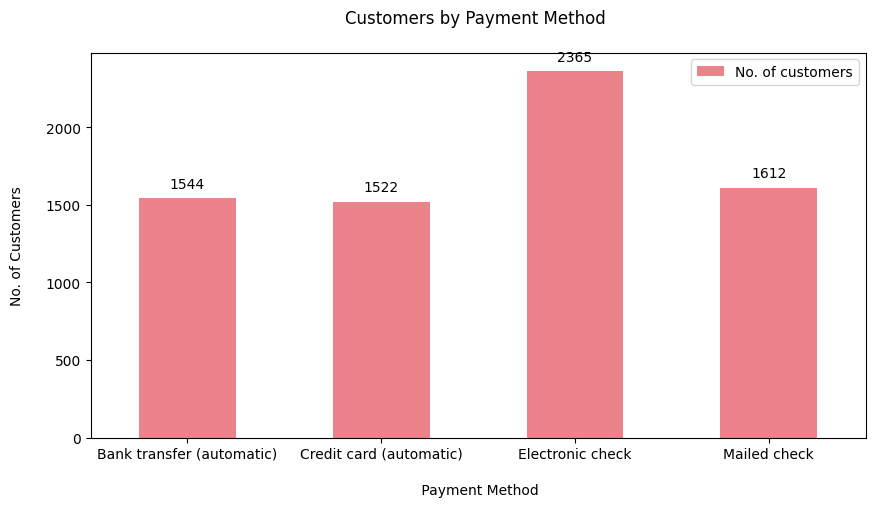

In [ ]:
#(2) Distribution of Payment Method Type---------------------------------------------------------------------------------------

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#ec838a', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

Answer:
1. Metode pembayaran paling umum adalah **Electronic Check**, digunakan oleh 2.365 pelanggan.  
2. **Pembayaran otomatis** (Bank transfer & Credit card) memiliki jumlah pelanggan paling sedikit.  
3. **Mailed Check** masih cukup banyak digunakan, menunjukkan bahwa beberapa pelanggan lebih nyaman dengan metode pembayaran tradisional.

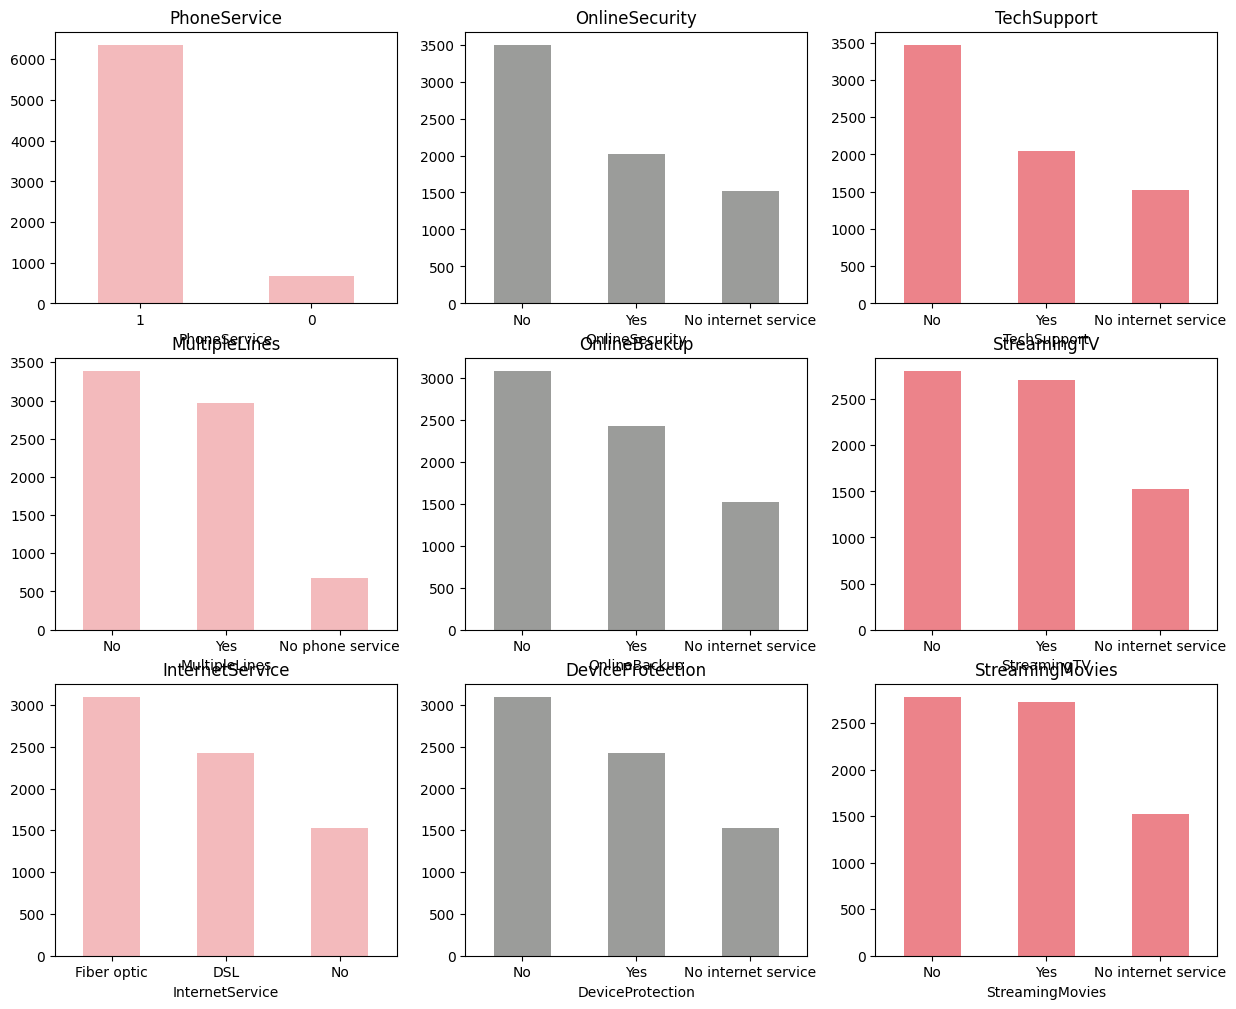

In [ ]:
#(3) Distribution of various Label Encoded Categorical Variables---------------------------------------------------------------------------------------

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

What are the insights from above diagrams?

Answer:
1. **PhoneService**: Layanan telepon masih menjadi kebutuhan utama pelanggan, meskipun ada yang tidak menggunakannya.  
2. **MultipleLines**: Lebih banyak pelanggan memilih satu jalur telepon dibandingkan multiple lines, sementara sebagian kecil tidak memiliki layanan telepon.  
3. **InternetService**: Fiber Optic lebih populer dibandingkan DSL, namun ada juga pelanggan tanpa layanan internet.  
4. **OnlineSecurity**: Mayoritas pelanggan tidak menggunakan layanan keamanan online, sebagian lainnya menggunakannya, dan ada yang tidak memiliki internet.  
5. **OnlineBackup**: Sebagian besar pelanggan tidak menggunakan backup online, sebagian lainnya menggunakannya, dan ada yang tidak memiliki internet.  
6. **DeviceProtection**: Mayoritas pelanggan tidak menggunakan proteksi perangkat, sebagian menggunakannya, dan sisanya tidak memiliki internet.  
7. **TechSupport**: Sebagian besar pelanggan tidak memiliki dukungan teknis, sebagian lainnya memilikinya, dan ada yang tidak memiliki internet.  
8. **StreamingTV**: Jumlah pelanggan yang menggunakan dan tidak menggunakan Streaming TV hampir seimbang, sementara sebagian tidak memiliki internet.  
9. **StreamingMovies**: Pelanggan yang menonton dan tidak menonton film streaming hampir seimbang, dengan sebagian tidak memiliki internet.

<ipython-input-23-ae27b98f4ff7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


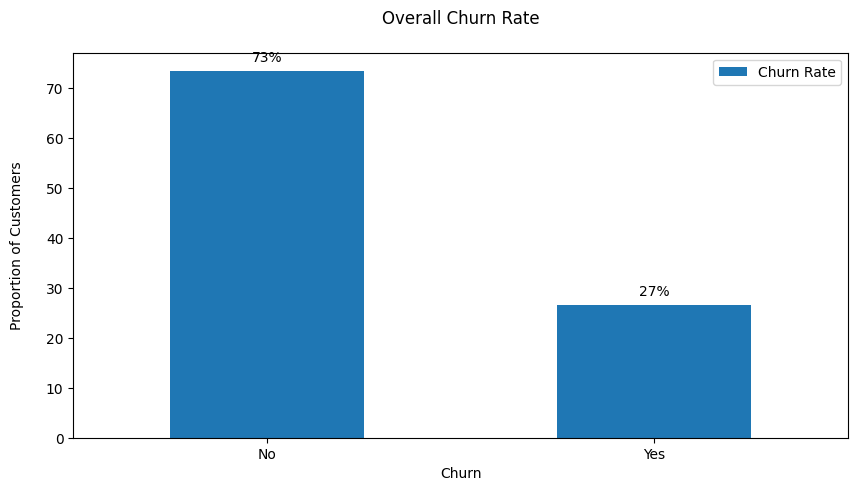

In [ ]:
#Step 9.3: Analyze Churn Rate by Categorical variables:   -------------------------------------------------------------

#(1) Overall Churn Rate------------------------------------------------------------------------------------------
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn","customerID"]]
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))

sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate["Churn Rate"] = (churn_rate["customerID"] / sum(churn_rate["customerID"]))*100
ax = churn_rate[["Churn Rate"]].plot.bar(title= "Overall Churn Rate", legend=True,
                                         table=False, grid=False, figsize=(10,5))

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Overall Churn Rate\n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

In [ ]:
dataset[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  0        2220
                1        1655
Two year        0        1647
One year        0        1307
                1         166
Two year        1          48
Name: count, dtype: int64

<ipython-input-24-136ff39434e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = np.where(churn_rate["Churn"] == 0, "No", "Yes")


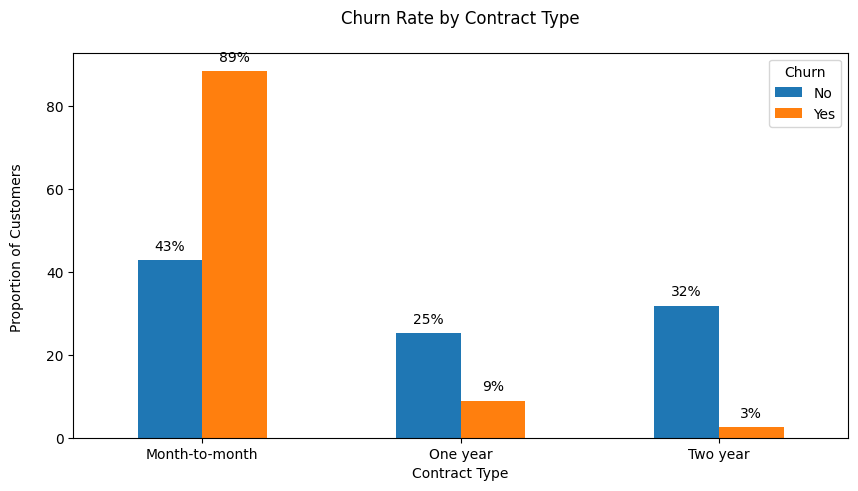

In [ ]:
import matplotlib.ticker as mtick

churn_rate = dataset[["Churn", "Contract"]]
churn_rate["churn_label"] = np.where(churn_rate["Churn"] == 0, "No", "Yes")

grouped = churn_rate.groupby(["churn_label", "Contract"]).size().unstack()
churn_rate = grouped.apply(lambda x: (x / x.sum()) * 100, axis=1)
ax = churn_rate.T.plot(kind='bar', figsize=(10,5), title="Churn Rate by Contract Type")

plt.ylabel('Proportion of Customers \n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.xlabel('Contract Type', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.title('Churn Rate by Contract Type\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom' if y_value >= 0 else 'top'
        label = "{:.0f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va
        )

add_value_labels(ax)

In [ ]:
dataset[['PaymentMethod', 'Churn']].value_counts()

,,count
PaymentMethod,Churn,
Mailed check,0,1304
Electronic check,0,1294
Credit card (automatic),0,1290
Bank transfer (automatic),0,1286
Electronic check,1,1071
Mailed check,1,308
Bank transfer (automatic),1,258
Credit card (automatic),1,232


<ipython-input-26-8505468f0542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = np.where(churn_rate["Churn"] == 0, "No", "Yes")


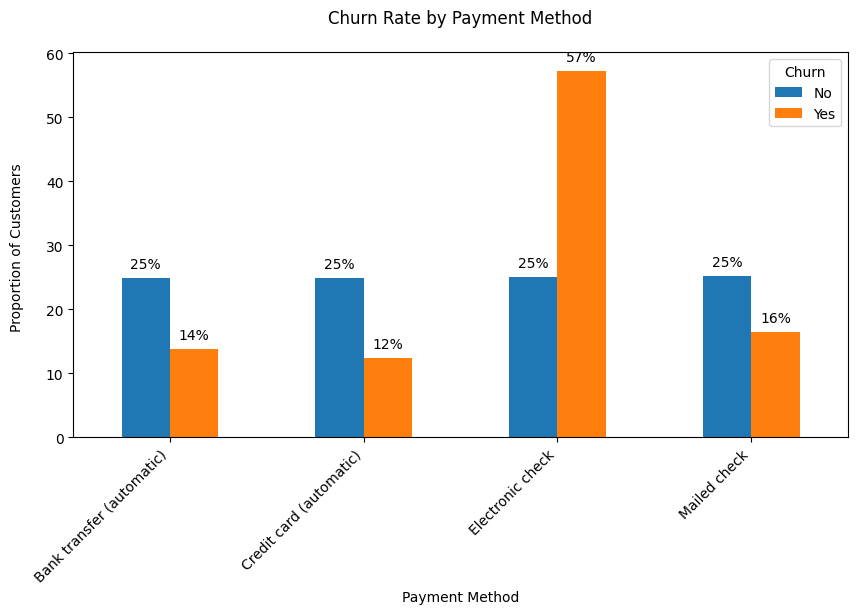

In [ ]:
churn_rate = dataset[["Churn", "PaymentMethod"]]
churn_rate["churn_label"] = np.where(churn_rate["Churn"] == 0, "No", "Yes")

grouped = churn_rate.groupby(["churn_label", "PaymentMethod"]).size().unstack()
churn_rate = grouped.apply(lambda x: (x / x.sum()) * 100, axis=1)
ax = churn_rate.T.plot(kind='bar', figsize=(10,5), title="Churn Rate by Payment Method")

plt.ylabel('Proportion of Customers \n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.xlabel('Payment Method', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.title('Churn Rate by Payment Method\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45, horizontalalignment="right")
plt.yticks(rotation=0, horizontalalignment="right")

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom' if y_value >= 0 else 'top'
        label = "{:.0f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va
        )

add_value_labels(ax)

# 10. Encode Categorical Data

In [ ]:
#Step 10: Encode Categorical data----------------------------------------------------------------
#Incase if user_id is an object:
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy
dataset= pd.get_dummies(dataset)

#Rejoin userid to dataset (column concatenation)
dataset = pd.concat([dataset, identity], axis = 1)


In [ ]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,30.0,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1890.0,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.0,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1841.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,152.0,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.0,0,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7363.0,0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.0,0,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,307.0,1,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,8361-LTMKD


# 11. Split Dataset into Dependent and Independent Variables

In [ ]:
#Step 11: Split dataset into dependent and independent variables-----------------------------------
#identify response variable:
x = dataset.drop(columns="Churn")
y = dataset["Churn"]

# 12. Generate training and test datasets of dependent and independent variables


In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
2499,1,0,0,1,41,1,0,70.20,2895.0,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,6061-GWWAV
5807,1,0,0,0,57,1,0,18.80,1094.0,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,8464-EETCQ
5118,0,0,1,0,42,1,1,85.90,3730.0,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,7621-VPNET
275,1,0,1,0,5,1,1,85.40,401.0,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,6432-TWQLB
1350,0,0,1,0,67,1,0,65.65,4323.0,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,4102-HLENU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.0,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,6303-KFWSL
1954,1,0,0,0,1,1,1,75.45,75.0,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,5834-ASPWA
525,1,0,0,0,52,1,0,91.25,4738.0,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,0750-EBAIU
5748,0,0,0,0,21,1,1,99.85,1993.0,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,4686-UXDML


# 13. Removing Identifiers

In [ ]:
# Step 13: Removing Identifiers-------------------------------------------------------------------
train_id = X_train["customerID"]
X_train = X_train.drop(columns = ["customerID"])

test_id = X_test["customerID"]
X_test = X_test.drop(columns = ["customerID"])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2895.0,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True
5807,1,0,0,0,57,1,0,18.80,1094.0,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
5118,0,0,1,0,42,1,1,85.90,3730.0,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False
275,1,0,1,0,5,1,1,85.40,401.0,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False
1350,0,0,1,0,67,1,0,65.65,4323.0,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.0,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
1954,1,0,0,0,1,1,1,75.45,75.0,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
525,1,0,0,0,52,1,0,91.25,4738.0,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
5748,0,0,0,0,21,1,1,99.85,1993.0,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False


# 14. Feature Scaling

In [ ]:
# Step 14: Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.283964,1.030277,-0.327252,-0.847780,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,-0.818733,-0.529854,1.278739,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.515001,1.030277,-0.327252,-0.847780,-0.731253,-0.872769,1.887311,-0.986250,1.887311,-0.635561,-0.881957,1.887311,-0.722982,-0.888655,1.887311,-0.717014,-1.00071,1.887311,-0.624290,-0.818733,1.887311,-0.782021,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.654390,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.822432,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.917459,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.281655,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.967054,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.101562,1.030277,-0.327252,-0.847780,-0.731253,1.145778,-0.529854,-0.986250,-0.529854,1.573414,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624

# 15. Model Selection

In [ ]:
#Step 15.1: Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

# Other models
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)))

#tambahkan mode lain
models.append(('SVM', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=0)))
models.append(('XGBoost', XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, eval_metric='logloss', random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('Naïve Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

#set table to populate with perfo, performance result
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)

#Evaluate model
i = 0
for name, model in models:
    kfold = KFold(n_splits = 10) #10 Cross validation
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] =[name, round(cv_auc_results.mean()*100,2), round(cv_auc_results.std()*100,2),
                         round(cv_acc_results.mean()*100,2), round(cv_acc_results.std()*100,2)]
    i += 1
model_results.sort_values(by=['ROC AUC Mean'], ascending = False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
3,XGBoost,84.58,1.87,80.42,1.17
0,Logistic Regression,84.34,1.62,74.42,1.15
6,Decision Tree,82.69,1.44,78.49,1.17
1,Random Forest,82.46,2.22,79.32,1.43
5,Naïve Bayes,81.85,1.89,69.28,1.50
2,SVM,79.56,2.12,79.71,1.18
4,KNN,77.31,2.08,76.00,0.85


#Task 1
Do the exact same modelling process, but with preprocessing : handling imbalance data !

### Step 15.3. SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

data = pd.read_csv('customer_churn_data.csv')

In [ ]:
data = data.drop(columns=['customerID'])


data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Pisahkan fitur dan target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Menerapkan SMOTE pada Data Training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Memerika distribusi setelah Oversampling
distribution_smote = y_train_smote.value_counts(normalize=True)
distribution_smote

,proportion
Churn,
0,0.5
1,0.5


### 15.4. Searching Optimum Number of Trees for Random Forest Model

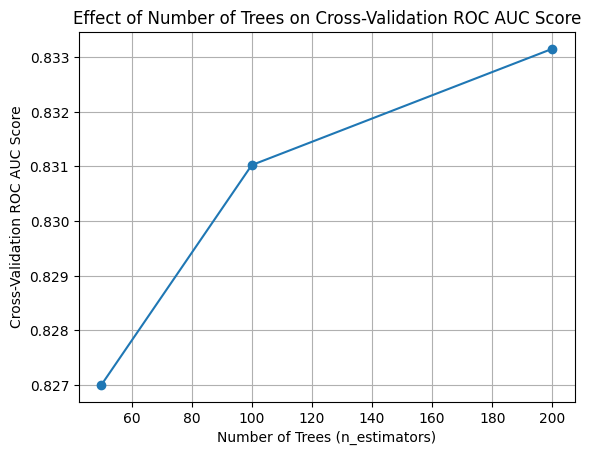

In [ ]:
n_estimators_range = [50,100,200]
cv_scores = []

for n in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    cv_scores.append(scores.mean())

plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation ROC AUC Score')
plt.title('Effect of Number of Trees on Cross-Validation ROC AUC Score')
plt.grid(True)
plt.show()

In [ ]:
optimal_n_estimators = n_estimators_range[np.argmax(cv_scores)]
print(f"Optimal Number of Trees: {optimal_n_estimators}")
print(f"Best Cross-Validation ROC AUC Score: {np.max(cv_scores)}")

Optimal Number of Trees: 200
Best Cross-Validation ROC AUC Score: 0.8331561425960556


###Step 15.4. Compare Baseline Classification Algorithms

In [ ]:
# Split Data menjadi Train dan Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.utils import resample

# Oversampling pada Training Set
data_train = pd.concat([X_train, y_train], axis=1)
majority = data_train[data_train.Churn == 0]
minority = data_train[data_train.Churn == 1]

minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

train_oversampled = pd.concat([majority, minority_oversampled])

In [ ]:
# Pisahkan fitur & target setelah Oversampling
X_train_oversampled = train_oversampled.drop('Churn', axis=1)
y_train_oversampled = train_oversampled['Churn']

In [ ]:
# Standarisasi setelah Oversampling
X_train_oversampled_scaled = scaler.fit_transform(X_train_oversampled)

In [ ]:
# Modeling
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_oversampled_scaled, y_train_oversampled)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("\n" + "-"*50 + "\n")

Logistic Regression Results:
[[556 479]
 [ 51 323]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      1035
           1       0.40      0.86      0.55       374

    accuracy                           0.62      1409
   macro avg       0.66      0.70      0.61      1409
weighted avg       0.78      0.62      0.64      1409

ROC AUC Score: 0.700417215634607

--------------------------------------------------



In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_oversampled_scaled, y_train_oversampled)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))
print("\n" + "-"*50 + "\n")

Decision Tree Results:
[[814 221]
 [133 241]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.52      0.64      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409

ROC AUC Score: 0.7154292283448294

--------------------------------------------------



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_oversampled_scaled, y_train_oversampled)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Results:
[[879 156]
 [154 220]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC AUC Score: 0.718755328218244


###Step 15.5. Visualize the results and compare the baseline algorithms

In [ ]:
# Menghitung F2 Score
def f2_score(precision, recall):
    return (5 * precision * recall) / (4 * precision + recall)

In [ ]:
# Mengumpulkan Hasil
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_lr, y_pred_dt, y_pred_rf]
roc_auc_scores = [roc_auc_score(y_test, y_pred_lr),
                  roc_auc_score(y_test, y_pred_dt),
                  roc_auc_score(y_test, y_pred_rf)]

In [ ]:
# Menghitung Metrik untuk Setiap Model
results = []
for i, model in enumerate(models):
    cm = confusion_matrix(y_test, y_preds[i])
    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f2 = f2_score(precision, recall)

    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'F2 Score': f2,
        'ROC-AUC': roc_auc_scores[i]
    })

In [ ]:
results_sm = pd.DataFrame(results)
results_sm = results_sm.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)
results_sm

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,ROC-AUC
2,Random Forest,0.779986,0.585106,0.588235,0.586667,0.587607,0.718755
1,Decision Tree,0.748758,0.521645,0.644385,0.576555,0.615424,0.715429
0,Logistic Regression,0.623847,0.402743,0.863636,0.549320,0.702785,0.700417


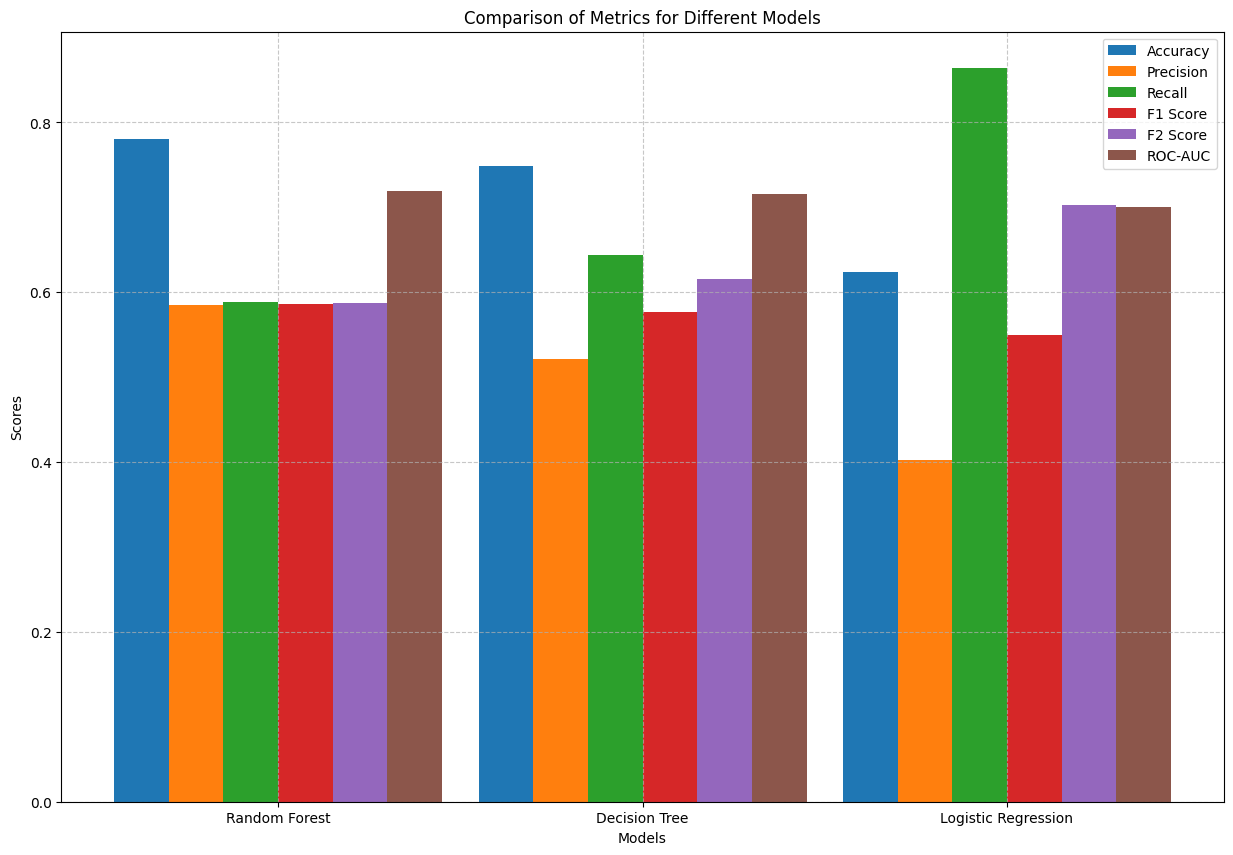

In [ ]:
# Visualisasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC']
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 10))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_sm[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Different Models')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(results_sm['Model'])
ax.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 16. Train & Evaluate Chosen Model

In [ ]:
# Menggunakan Model Terbaik (Random Forest)
chosen_model = RandomForestClassifier(random_state=42)

# Fitting Model pada Train Set
chosen_model.fit(X_train_oversampled_scaled, y_train_oversampled)

# Memprediksi Hasil pada Test Set
y_pred_chosen = chosen_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model using ROC Graph
print("Chosen Model: Random Forest")
print(confusion_matrix(y_test, y_pred_chosen))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_chosen))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_chosen))

Chosen Model: Random Forest
[[879 156]
 [154 220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC AUC Score: 0.718755328218244


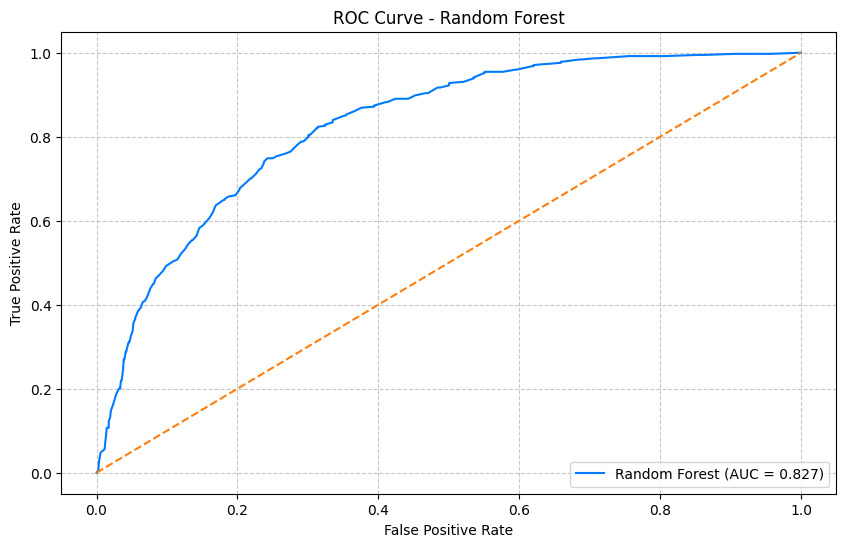

In [ ]:
from sklearn.metrics import roc_curve, auc

# Menghitung ROC Curve dan AUC
y_prob_chosen = chosen_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_chosen)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#007BFF', label='Random Forest (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#FF7F0E', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##Analysis

---



In [ ]:
print ('Result Before Oversampling : ')
print (results)
print ('  ')
print ('Result After Oversampling : ')
print (results_sm)

Result Before Oversampling : 
[{'Model': 'Logistic Regression', 'Accuracy': 0.6238466997870831, 'Precision': 0.4027431421446384, 'Recall': 0.8636363636363636, 'F1 Score': 0.5493197278911565, 'F2 Score': 0.7027850304612708, 'ROC-AUC': 0.700417215634607}, {'Model': 'Decision Tree', 'Accuracy': 0.7487579843860894, 'Precision': 0.5216450216450217, 'Recall': 0.6443850267379679, 'F1 Score': 0.5765550239234449, 'F2 Score': 0.6154239019407559, 'ROC-AUC': 0.7154292283448294}, {'Model': 'Random Forest', 'Accuracy': 0.7799858055358411, 'Precision': 0.5851063829787234, 'Recall': 0.5882352941176471, 'F1 Score': 0.5866666666666667, 'F2 Score': 0.5876068376068376, 'ROC-AUC': 0.718755328218244}]
  
Result After Oversampling : 
                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
2        Random Forest  0.779986   0.585106  0.588235  0.586667  0.587607   
1        Decision Tree  0.748758   0.521645  0.644385  0.576555  0.615424   
0  Logistic Regression  0.623847   0.402743  0.8

Apa insight yang bisa didapat dengan handling data imbalance pada data diatas? Teknik apa yang anda gunakan? Jelaskan!

**Insight**:
1. Gunakan Random Forest jika ingin model dengan akurasi terbaik dan seimbang.
2. Gunakan Logistic Regression jika ingin model dengan recall tinggi untuk mendeteksi kelas minoritas.
3. Gunakan Decision Tree jika ingin model sederhana dengan performa cukup baik.

**Teknik yang digunakan**:

Teknik SMOTE digunakan untuk menangani ketidakseimbangan kelas dalam data dengan membuat sampel sintetis untuk kelas minoritas. Teknik ini berguna untuk meningkatkan performa model dalam menangani kelas yang tidak seimbang, terutama dalam masalah klasifikasi.

SMOTE diterapkan setelah data di-split, jika dilakukan sebelum splitting, maka:
1. Proporsi data pada train & test bisa berubah, misalnya dari 74:26 menjadi 50:50.
2. Informasi dari test set bisa bocor ke train set (karena data sintetis dibuat berdasarkan keseluruhan dataset).
3. Model bisa mengalami overfitting karena data sintetis bisa memiliki pola yang terlalu mirip dengan data asli.
